# Homework 1

**Inhalt:** Datensets explorieren, filtern, Felder erstellen

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Review und Übung

# Das Beispiel

Fussballstadien

Quelle/Beschreibung: http://opisthokonta.net/?cat=34

Link zum csv-File: http://opisthokonta.net/wp-content/uploads/2015/03/stadiums_20150302.csv

Wir haben das File bereits abgelegt und gespeichert, im Unterordner `dataprojects/stadiums`.

## Vorbereitung

Importieren Sie die benötigten Libraries.

In [2]:
import pandas as pd

## Daten laden

Öffnen Sie das Datenfile in Pandas, indem Sie es vom lokalen Ordner laden

In [4]:
df = pd.read_csv('dataprojects/stadiums/stadiums_20150302.csv')

Übrigens, Sie können das Datenfile auch direkt aus dem Web einlesen. Wie? Versuchen Sie, es herauszufinden (probieren geht über studieren!).

In [5]:
df = pd.read_csv('http://opisthokonta.net/wp-content/uploads/2015/03/stadiums_20150302.csv')

Untersuchen Sie die Struktur der Daten: Länge, Datenfelder, erste Zeilen

In [6]:
df.shape

(164, 8)

In [7]:
df.dtypes

Team          object
FDCOUK        object
City          object
Stadium       object
Capacity       int64
Latitude     float64
Longitude    float64
Country       object
dtype: object

In [8]:
df.head(3)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England


Sind die Daten vollständig?

## Einfache Auswertungen

Welche Länder sind in der Datenbank vertreten?

In [9]:
df['Country'].unique()

array(['England', 'Scotland', 'Germany', 'Spain', 'France'], dtype=object)

Wie viele Stadien sind pro Land in der Datenbank?

In [10]:
df['Country'].value_counts()

England     72
France      26
Spain       25
Germany     23
Scotland    18
Name: Country, dtype: int64

In welchen fünf Städten stehen am meisten Fussballstadien?

In [11]:
df['City'].value_counts().head(5)

London       9
Madrid       3
Glasgow      3
Sheffield    2
Dundee       2
Name: City, dtype: int64

Wie viele Stadien stehen östlich von Greenwich (also dem Null-Meridian)?

In [12]:
len(df[df['Longitude'] > 0])

52

## Ranglisten

Welche zehn Clubs haben die grössten Stadien?

In [13]:
df.sort_values('Capacity', ascending=False).head(10)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany
64,Bayern Munich,Bayern Munich,Munich,Allianz Arena,71000,48.218775,11.624753,Germany
76,Schalke 04,Schalke 04,Gelsenkirchen,Veltins-Arena,61673,51.554503,7.067589,Germany
46,Celtic,Celtic,Glasgow,Celtic Park,60832,55.849711,-4.205589,Scotland
77,VfB Stuttgart,Stuttgart,Stuttgart,Mercedes-Benz Arena,60441,48.792269,9.232031,Germany
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England


Erstellen Sie eine neue Spalte ("Bezeichnung"), die den Teamnamen und das Stadion enthält (z.B. "Barcelona: Camp Nou")

Hint: Man kann Serien mit Text-Content genauso wie Serien mit Zahlen-Content addieren.

In [14]:
df['Bezeichnung'] = df['Team'] + ": " + df['Stadium']

Speichern Sie die zehn Clubs mit den grössten Stadien in einem separaten Dataframe.

In [15]:
df_top10 = df.sort_values('Capacity', ascending=False).head(10)

Erstellen Sie einen horizontalen Barchart mit der Stadion-Bezeichnung und der Kapazität.

<AxesSubplot:title={'center':'Die zehn grössten Fussballstadien'}, ylabel='Bezeichnung'>

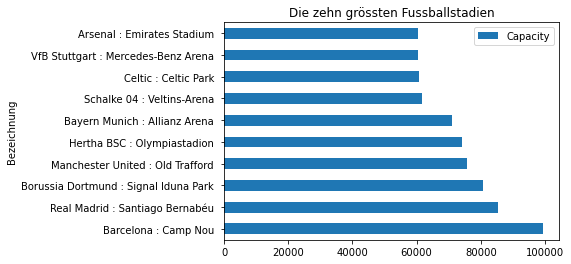

In [16]:
df_top10.plot(kind='barh', x='Bezeichnung', y='Capacity', title='Die zehn grössten Fussballstadien')

## Gruppierte Auswertung

Ordnen Sie die Länder nach der Durchschnittsgrösse der Stadien.

In [17]:
df.groupby('Country')['Capacity'].mean().sort_values(ascending=False)

Country
Germany     45688.043478
Spain       37407.600000
France      27250.923077
England     25693.458333
Scotland    17261.222222
Name: Capacity, dtype: float64

Welches sind die grössten drei Stadien östlich des Null-Meridians?

In [18]:
df[df['Longitude'] > 0].sort_values('Capacity', ascending=False).head(3)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain,Barcelona : Camp Nou
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany,Borussia Dortmund : Signal Iduna Park
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany,Hertha BSC : Olympiastadion


Welches sind die grössten drei Stadien westlich des Null-Meridians?

In [19]:
df[df['Longitude'] < 0].sort_values('Capacity', ascending=False).head(3)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain,Real Madrid : Santiago Bernabéu
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England,Manchester United : Old Trafford
46,Celtic,Celtic,Glasgow,Celtic Park,60832,55.849711,-4.205589,Scotland,Celtic : Celtic Park


Erstellen Sie ein Dataframe, das ausschliesslich Stadien mit über 80000 Zuschauern enthält.

In [20]:
df[df['Capacity'] > 80000]

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany,Borussia Dortmund : Signal Iduna Park
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain,Barcelona : Camp Nou
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain,Real Madrid : Santiago Bernabéu


Bei den Städten hat es zT Leerschläge drin. Führen Sie folgenden Code aus, um sie zu entfernen:

In [21]:
df['City'] = df['City'].str.strip()

Erstellen Sie ein Dataframe, das nur die Stadien aus Madrid und Glasgow enthält.

In [22]:
df_lonmad = df[(df['City'] == 'Glasgow') | (df['City'] == 'Madrid')]
df_lonmad

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
46,Celtic,Celtic,Glasgow,Celtic Park,60832,55.849711,-4.205589,Scotland,Celtic : Celtic Park
52,Partick Thistle,Partick,Glasgow,Firhill Stadium,10887,55.881556,-4.269639,Scotland,Partick Thistle : Firhill Stadium
53,Rangers,Rangers,Glasgow,Ibrox Stadium,51082,55.853206,-4.309258,Scotland,Rangers : Ibrox Stadium
87,Atlético Madrid,Ath Madrid,Madrid,Vicente Calderón,54851,40.401719,-3.720606,Spain,Atlético Madrid : Vicente Calderón
98,Rayo Vallecano,Vallecano,Madrid,Campo de Vallecas,15489,40.391944,-3.658961,Spain,Rayo Vallecano : Campo de Vallecas
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain,Real Madrid : Santiago Bernabéu


Vergleichen Sie die Stadien der beiden Städe anhand des Medianwerts.

In [23]:
df_lonmad.groupby('City')['Capacity'].median()

City
Glasgow    51082
Madrid     54851
Name: Capacity, dtype: int64

## Ein Histogramm

Wie ist die Verteilung der Stadiongrösse? Zeichnen Sie ein Histogramm mit genügend feiner Aufgliederung.

<AxesSubplot:>

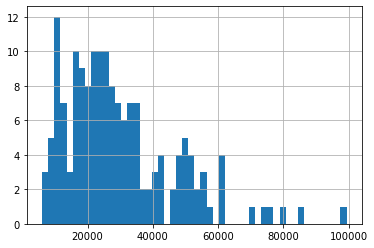

In [24]:
df['Capacity'].hist(bins=50)

## Ein hübscher Scatterplot

Man würde das normalerweise anders machen, aber da wir hier schon die Koordinaten haben...

- Definieren Sie einen Parameter "area" für die Punktegrösse, der sich an der Kapazität orientiert.

In [25]:
area = df['Capacity'] / 300

- Und plotten sie die Stadien auf einer "Landkarte" (Longitude auf der x-Achse, Latitude auf der y-Achse)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

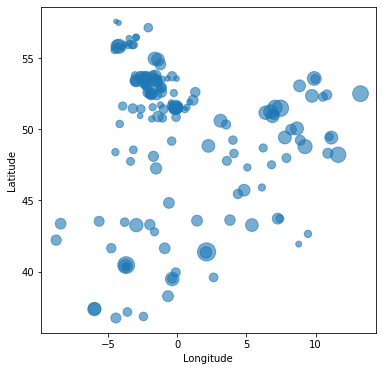

In [26]:
df.plot(kind='scatter', x='Longitude', y='Latitude', s=area, alpha=0.6, figsize=(6, 6))